# Explore here

Problem Statement: 
What can we learn about different hosts and areas?
What can we learn from predictions? (ex: locations, prices, reviews, etc)
Which hosts are the busiest and why?
Is there any noticeable difference of traffic among different areas and what could be the reason for it?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  f

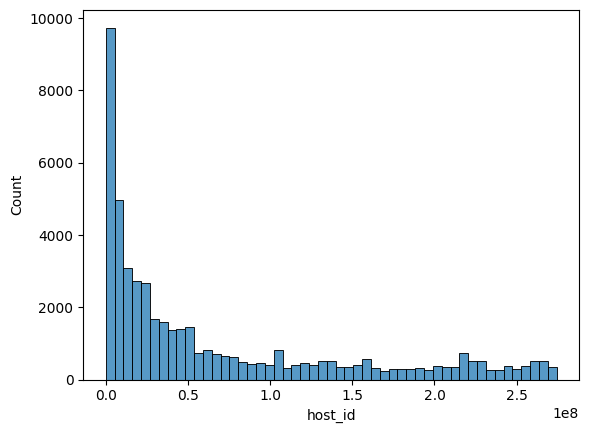

37457
host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: count, Length: 37457, dtype: int64
327
0        6
1        2
2        1
3        1
4        1
        ..
48890    2
48891    2
48892    1
48893    6
48894    1
Name: calculated_host_listings_count, Length: 48895, dtype: int64
Max Host Count: 327
0        6
1        2
2        1
3        1
4        1
        ..
48890    2
48891    2
48892    1
48893    6
48894    1
Name: calculated_host_listings_count, Length: 48895, dtype: int64
Min Host Count: 1
There looks to be a concentration of host ids that are small. 
This may be due to the growth in Airbnb over the years.
As the host id numbers increased, many people probably made profiles and have deleted those.
For instance, host id 219517861 has 327 listings.


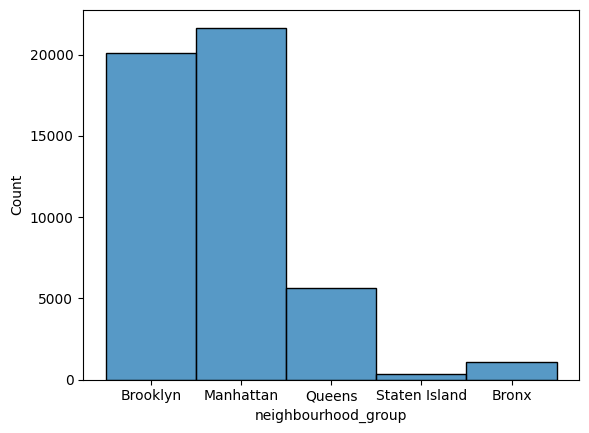

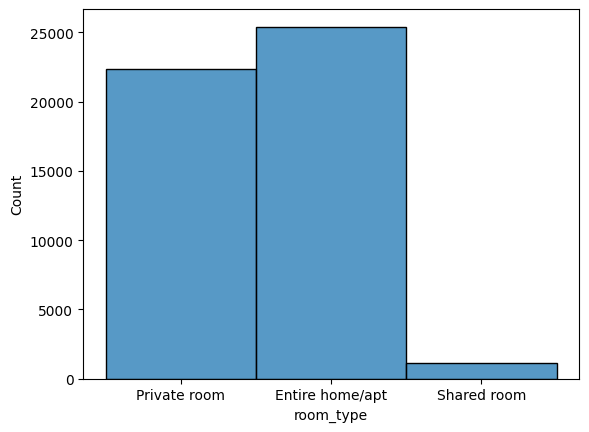

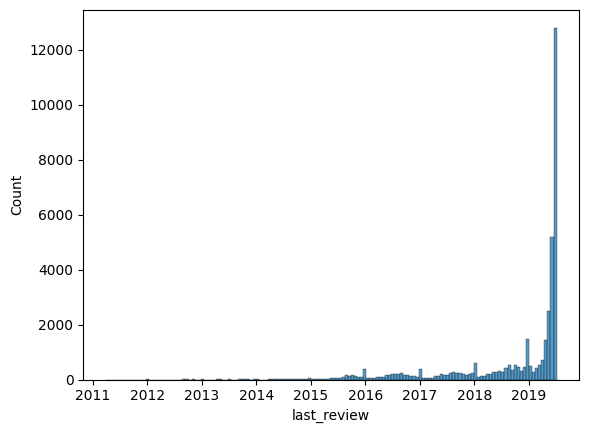

Private room: 0
Entire home/apt: 1
Shared room: 2
Brooklyn: 0
Manhattan: 1
Queens: 2
Staten Island: 3
Bronx: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_id                         48895 non-null  int64         
 1   neighbourhood_group             48895 non-null  object        
 2   room_type                       48895 non-null  object        
 3   price                           48895 non-null  int64         
 4   minimum_nights                  48895 non-null  int64         
 5   number_of_reviews               48895 non-null  int64         
 6   last_review                     38843 non-null  datetime64[ns]
 7   calculated_host_listings_count  48895 non-null  int64         
 8   availability_365                48895 non-null  int64         
 9   room_type_encoded          

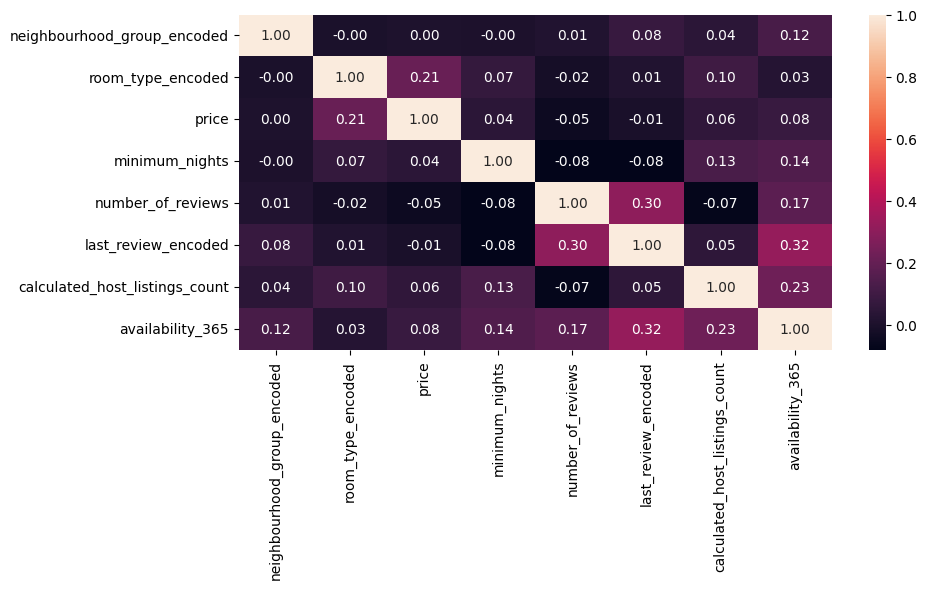

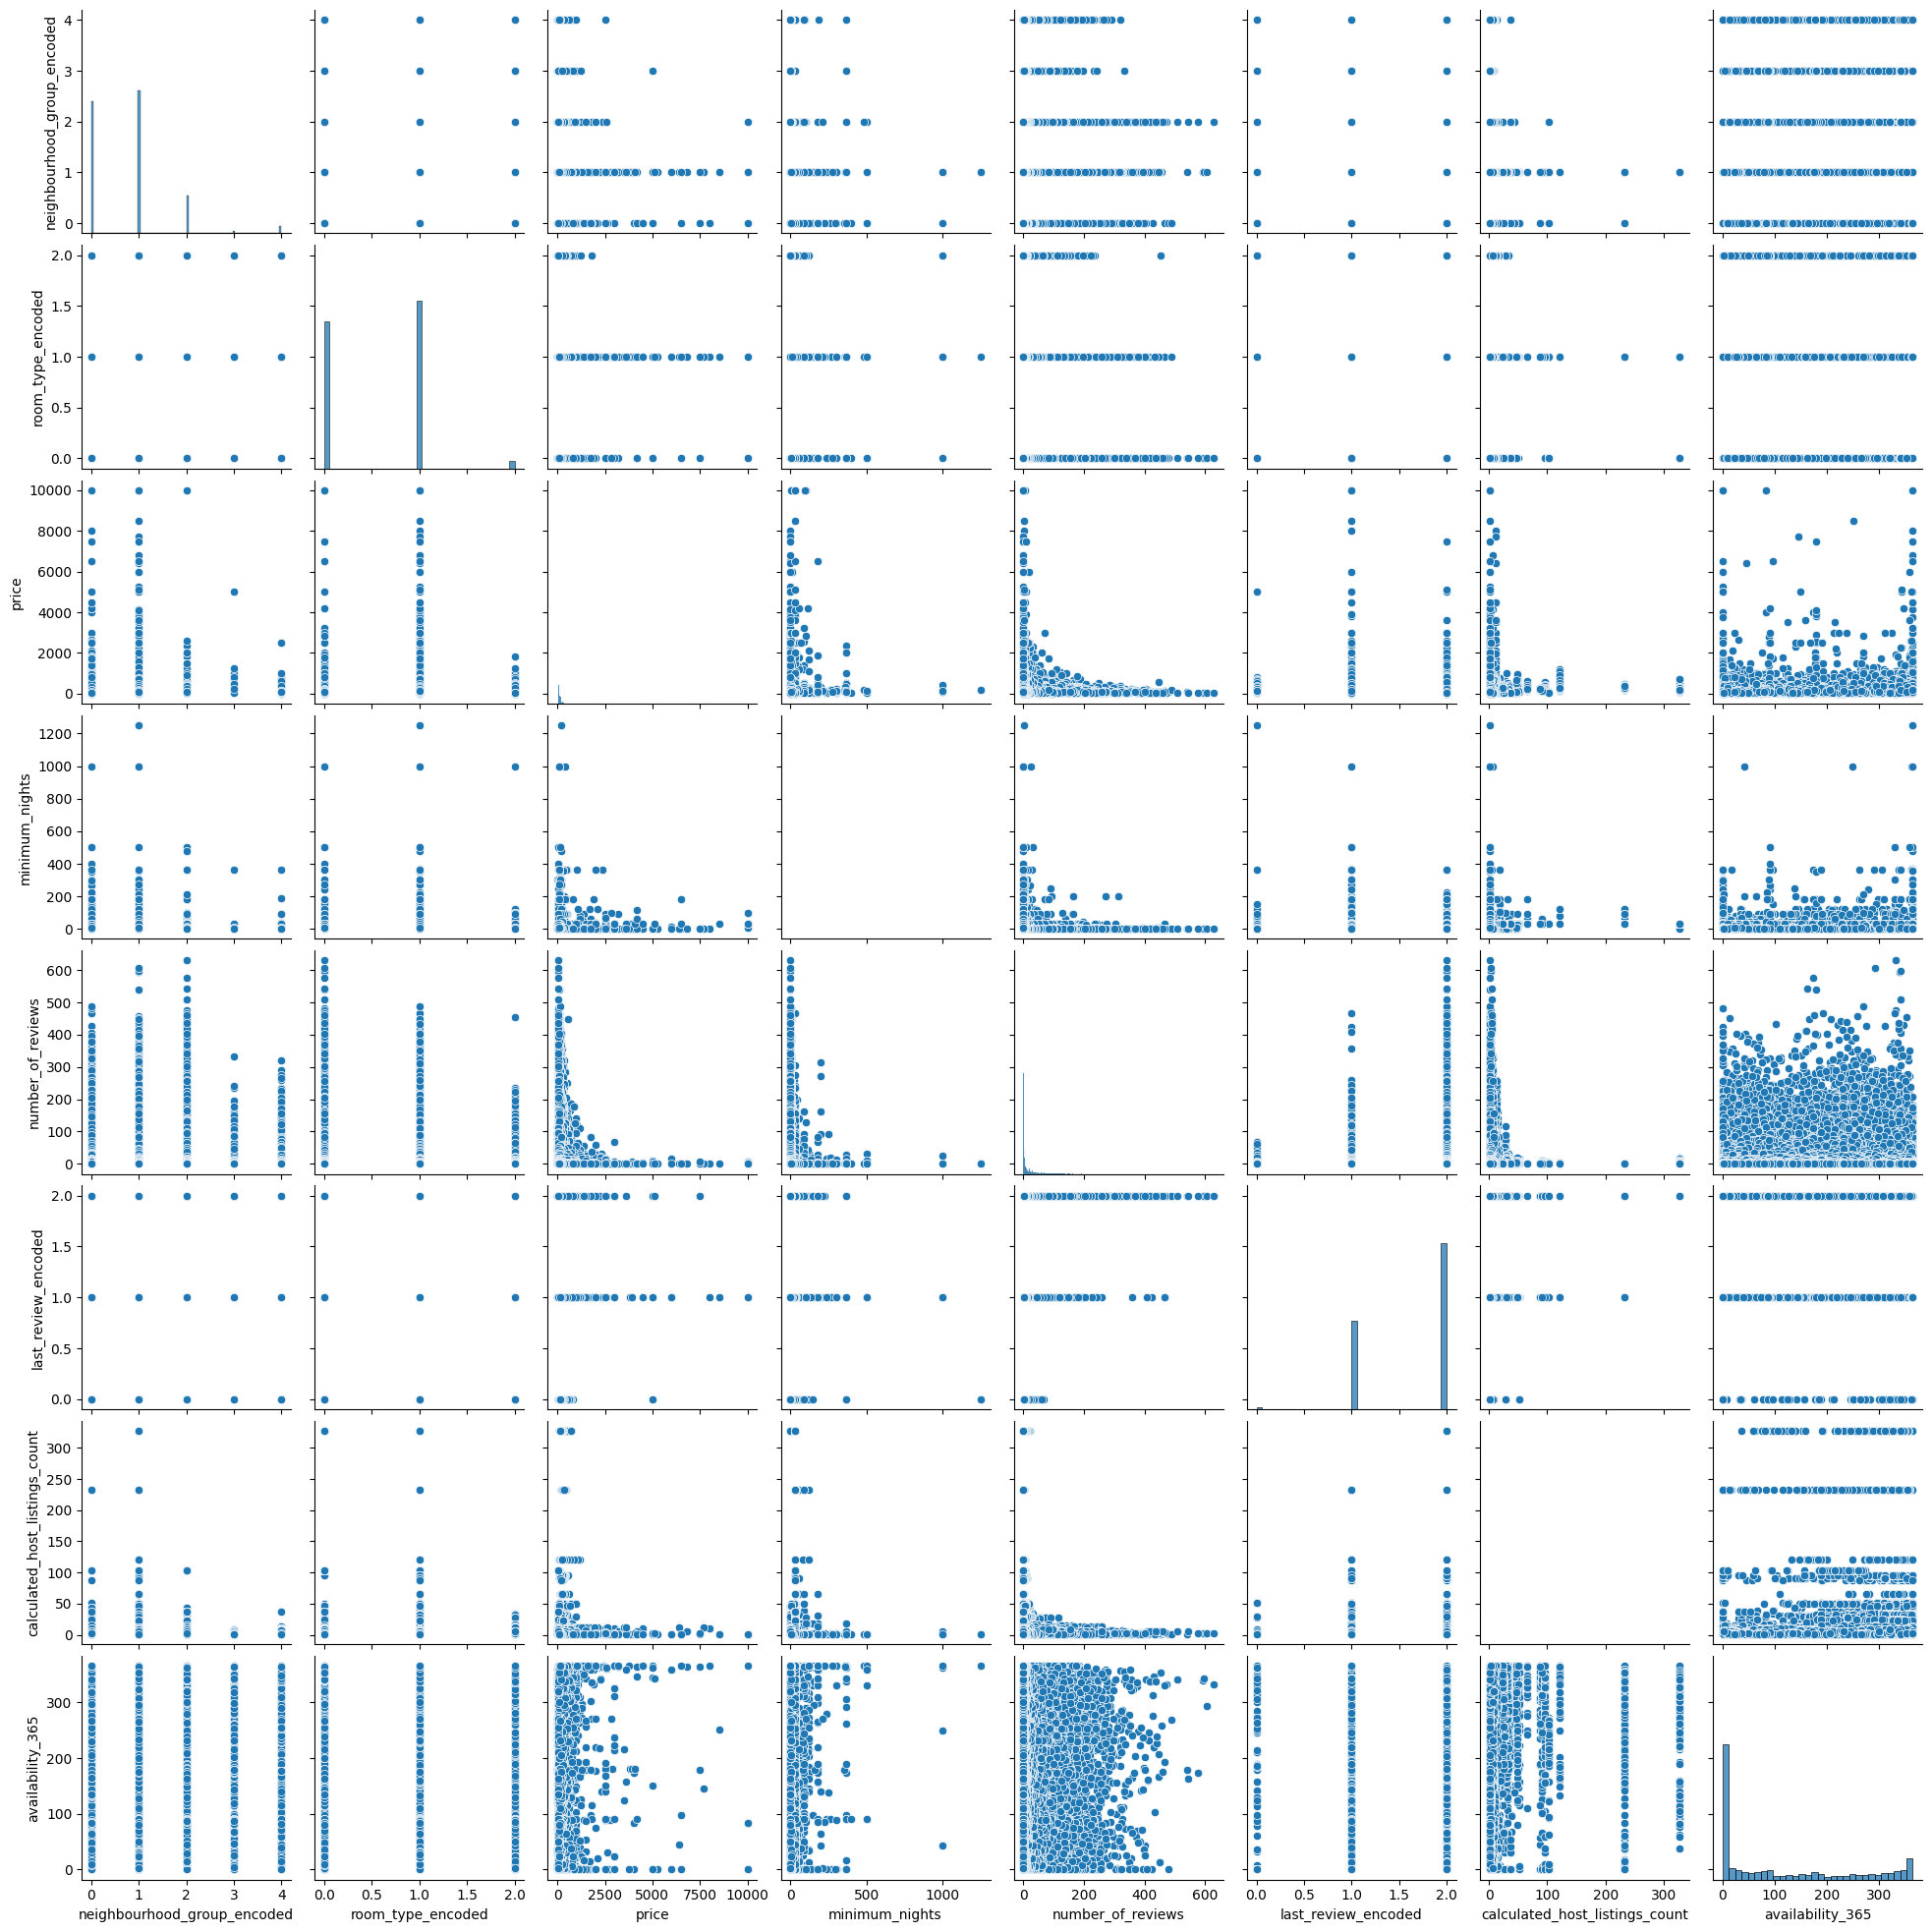

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

print('''Problem Statement: 
What can we learn about different hosts and areas?
What can we learn from predictions? (ex: locations, prices, reviews, etc)
Which hosts are the busiest and why?
Is there any noticeable difference of traffic among different areas and what could be the reason for it?\n''')

# Read data
total_data = pd.read_csv("/workspaces/machine-learning-python-template-ds-2023/Ryan/raw/NYC_AirBnB.csv")

# Obtain information about data types and non-null values
print(total_data.info())

# See data
print(total_data.head())

# Obtain dimensions
print(f'''{total_data.shape}\n''')

# Check for duplicates while eliminating id since it could be wrongly generated

print(f'''\nDuplicated: {total_data.drop("id", axis = 1).duplicated().sum}''')

if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)

# Eliminate irrelevant information

total_data.drop(["id", "name", "host_name", "latitude", "longitude", "neighbourhood", "reviews_per_month"], axis = 1, inplace = True)
total_data["last_review"] = pd.to_datetime(total_data["last_review"])


# Create histogram for host_id
sns.histplot(data = total_data, x = "host_id")
plt.show()



# Understand calculated host listings count

unique_values = total_data["host_id"].unique()
count_unique_values = len(unique_values)
print(count_unique_values)

value_counts = total_data["host_id"].value_counts()
print(value_counts)

max_count = total_data["host_id"].value_counts().max()
print(max_count)

print(total_data["calculated_host_listings_count"])
max_value = total_data["calculated_host_listings_count"].max()
print(f'''Max Host Count: {max_value}''')

print(total_data["calculated_host_listings_count"])
min_value = total_data["calculated_host_listings_count"].min()
print(f'''Min Host Count: {min_value}''')

print(f'''There looks to be a concentration of host ids that are small. 
This may be due to the growth in Airbnb over the years.
As the host id numbers increased, many people probably made profiles and have deleted those.
For instance, host id 219517861 has 327 listings.''')


# Create histogram for neighbourhood_group
sns.histplot(data = total_data, x = "neighbourhood_group")
plt.show()

# Create histogram for room_type
sns.histplot(data = total_data, x = "room_type")
plt.show()

# Create histogram for last_review
plot = sns.histplot(data=total_data, x="last_review")
plt.show()


# factorize room_type and print mappings

total_data["room_type_encoded"], unique_categories_room = pd.factorize(total_data["room_type"])

# Print out the mappings
for index_r, category_r in enumerate(unique_categories_room):
    print(f"{category_r}: {index_r}")


# factorize neighborhood_group and print mappings

total_data["neighbourhood_group_encoded"], unique_categories_neighbourhood = pd.factorize(total_data["neighbourhood_group"])

# Print out the mappings
for index_n, category_n in enumerate(unique_categories_neighbourhood):
    print(f"{category_n}: {index_n}")


# factorize neighborhood_group and print mappings

def label_review_dates(date):
    if date.year < 2015:
        return 0
    elif 2015 <= date.year < 2019:
        return 1
    elif date.year == 2019:
        return 2
    else:
        return np.nan  # or another value for dates outside these ranges, if any

# 3. Apply the custom function
total_data['last_review_encoded'] = total_data['last_review'].apply(label_review_dates)




print(total_data.info())

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["neighbourhood_group_encoded", "room_type_encoded", "price", "minimum_nights", "number_of_reviews", "last_review_encoded", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

sns.pairplot(data=total_data, vars=["neighbourhood_group_encoded", "room_type_encoded", "price", "minimum_nights", "number_of_reviews", "last_review_encoded", "calculated_host_listings_count", "availability_365"])
plt.show()

